<a href="https://colab.research.google.com/github/jolied-14/MLE-F2025/blob/main/ProjectProgress3Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd

# load dataset
df = pd.read_csv('/content/sample_data/Data2.csv')

In [21]:
# display the first few rows of the dataframe
print("First 5 rows of the dataset:")
display(df.head())

# get number of observations and features
num_observations = df.shape[0]
num_features = df.shape[1]

print(f"\nNumber of observations (rows): {num_observations}")
print(f"Number of features (columns): {num_features}")

First 5 rows of the dataset:


,Name,P1 _Convergence Length,P2 Divergence Length,P3_InletDiameter,P4_Throttle_Diameter,P5_ExitDiameter,P7_Pressure_Inlet,P6_Velocity
0,DP 0,15,15,12,3,15,1378950,119.130700
1,DP 1,28,30,21,1,9,474973,25.174023
2,DP 2,19,17,13,3,20,1285097,97.235954
3,DP 3,20,24,19,1,23,382353,28.955469
4,DP 4,13,14,11,3,13,822234,130.119600



Number of observations (rows): 1001
Number of features (columns): 8


In [22]:
print("\nFeature descriptions:")
# print information about each column (feature)
display(df.info())

feature_descriptions = {
    'Name': {'description': 'Unique identifier for each data point', 'type': 'categorical/text'},
    'P1 _Convergence Length': {'description': 'Length of the converging section of the nozzle', 'type': 'continuous'},
    'P2 Divergence Length': {'description': 'Length of the diverging section of the nozzle', 'type': 'continuous'},
    'P3_InletDiameter': {'description': 'Diameter of the nozzle inlet', 'type': 'continuous'},
    'P4_Throttle_Diameter': {'description': 'Diameter at the nozzle throat', 'type': 'continuous'},
    'P5_ExitDiameter': {'description': 'Diameter at the nozzle exit', 'type': 'continuous'},
    'P7_Pressure_Inlet': {'description': 'Inlet pressure of the flow', 'type': 'continuous'},
    'P6_Velocity': {'description': 'Exit velocity of the flow', 'type': 'continuous'},
    'FlowRegime': {'description': 'The classification of the nozzle flow (underexpanded, ideally expanded, overexpanded)', 'type': 'categorical'}
}

print("\nDetailed Feature Information:")
for feature, details in feature_descriptions.items():
    print(f"- {feature}: {details['description']} (Type: {details['type']})")
    # add why the feature is important for the problem
    if feature == 'FlowRegime':
        print("  Importance: This is the target variable aiming to predict.")
    elif feature in ['P1 _Convergence Length', 'P2 Divergence Length', 'P3_InletDiameter', 'P4_Throttle_Diameter', 'P5_ExitDiameter']:
        print("  Importance: These geometric parameters are crucial in determining the flow behavior and regime within the nozzle.")
    elif feature == 'P7_Pressure_Inlet':
        print("  Importance: Inlet pressure is a key boundary condition influencing the flow expansion and the formation of shocks or expansion fans.")
    elif feature == 'P6_Velocity':
         print("  Importance: Exit velocity is a direct indicator of the flow conditions and is related to the expansion process within the nozzle.")


Feature descriptions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    1001 non-null   object 
 1   P1 _Convergence Length  1001 non-null   int64  
 2   P2 Divergence Length    1001 non-null   int64  
 3   P3_InletDiameter        1001 non-null   int64  
 4   P4_Throttle_Diameter    1001 non-null   int64  
 5   P5_ExitDiameter         1001 non-null   int64  
 6   P7_Pressure_Inlet       1001 non-null   int64  
 7   P6_Velocity             1001 non-null   float64
dtypes: float64(1), int64(6), object(1)
memory usage: 62.7+ KB


None


Detailed Feature Information:
- Name: Unique identifier for each data point (Type: categorical/text)
- P1 _Convergence Length: Length of the converging section of the nozzle (Type: continuous)
  Importance: These geometric parameters are crucial in determining the flow behavior and regime within the nozzle.
- P2 Divergence Length: Length of the diverging section of the nozzle (Type: continuous)
  Importance: These geometric parameters are crucial in determining the flow behavior and regime within the nozzle.
- P3_InletDiameter: Diameter of the nozzle inlet (Type: continuous)
  Importance: These geometric parameters are crucial in determining the flow behavior and regime within the nozzle.
- P4_Throttle_Diameter: Diameter at the nozzle throat (Type: continuous)
  Importance: These geometric parameters are crucial in determining the flow behavior and regime within the nozzle.
- P5_ExitDiameter: Diameter at the nozzle exit (Type: continuous)
  Importance: These geometric parameters are c

## Q1.1 Answer

*   **Dataset Summary:** The dataset contains 1001 observations and 8 features related to converging-diverging (C-D) nozzles. These features include geometric parameters (Convergence Length, Divergence Length, Inlet Diameter, Throttle Diameter, Exit Diameter), inlet pressure, exit velocity, and the target variable, Flow Regime.

*   **Feature Descriptions and Importance:**
    *   **Name:** Unique identifier for each data point (Categorical/Text). While not directly used for modeling, it helps in identifying specific data points.
    *   **P1\_Convergence Length:** Length of the converging section of the nozzle (Continuous). Important as it influences the flow acceleration before the throat.
    *   **P2 Divergence Length:** Length of the diverging section of the nozzle (Continuous). Crucial for the expansion of the flow after the throat and determining the exit conditions.
    *   **P3\_InletDiameter:** Diameter of the nozzle inlet (Continuous). Affects the initial flow area and mass flow rate.
    *   **P4\_Throttle\_Diameter:** Diameter at the nozzle throat (Continuous). The smallest area, critical for determining whether the flow chokes and the subsequent expansion.
    *   **P5\_ExitDiameter:** Diameter at the nozzle exit (Continuous). Determines the final expansion ratio and is key in classifying the flow regime.
    *   **P7\_Pressure\_Inlet:** Inlet pressure of the flow (Continuous). A crucial boundary condition that, along with back pressure, dictates the pressure ratio across the nozzle and thus the flow regime.
    *   **P6\_Velocity:** Exit velocity of the flow (Continuous). A direct outcome of the expansion process and indicative of the flow regime.
    *   **FlowRegime:** The classification of the nozzle flow (underexpanded, ideally expanded, overexpanded) (Categorical). This is the target variable we aim to predict, representing the overall behavior of the flow within and exiting the nozzle.

In [23]:
# Display summary statistics for numerical features
print("Summary Statistics for Numerical Features:")
display(df.describe())

# Display value counts for categorical features (assuming 'FlowRegime' is categorical)
# If you have other categorical features, add them here
if 'FlowRegime' in df.columns:
    print("\nValue Counts for FlowRegime:")
    display(df['FlowRegime'].value_counts())
else:
    print("\nNo 'FlowRegime' column found for value counts.")


# Check for missing values
print("\nMissing Values per Feature:")
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

# Report on data quality issues
# Based on the output of df.info() and df.head(), there don't appear to be any immediate data quality issues like inconsistent entries or obvious errors.
if missing_values.sum() == 0:
    print("\nI have found no data quality issues and/or missing data for the dataset I am reporting.")
else:
    print("\nPotential data quality issues and/or missing data found. Please review the missing values table above.")

Summary Statistics for Numerical Features:


,P1 _Convergence Length,P2 Divergence Length,P3_InletDiameter,P4_Throttle_Diameter,P5_ExitDiameter,P7_Pressure_Inlet,P6_Velocity
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1.001000e+03,1001.000000
mean,19.819181,20.173826,16.354645,2.979021,16.408591,7.489110e+05,117.706198
std,6.164436,6.052417,5.155880,1.416531,5.085458,3.660974e+05,64.218010
min,10.000000,10.000000,8.000000,1.000000,8.000000,1.388290e+05,24.239660
25%,15.000000,15.000000,12.000000,2.000000,12.000000,4.249860e+05,65.793877
50%,20.000000,20.000000,16.000000,3.000000,16.000000,7.612540e+05,111.131700
75%,25.000000,25.000000,21.000000,4.000000,21.000000,1.052411e+06,158.183400
max,30.000000,30.000000,25.000000,5.000000,25.000000,1.378950e+06,375.665920



No 'FlowRegime' column found for value counts.

Missing Values per Feature:


,0



I have found no data quality issues and/or missing data for the dataset I am reporting.


## Q1.2 Answer

*   **Summary Statistics for Numerical Features:** The table below shows the count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum for the numerical features. This provides an overview of the central tendency, spread, and range of these parameters.

    Here are some of the key summary statistics:
    *   **P1 _Convergence Length:** Mean = 19.82, Std = 6.16, Min = 10.00, Max = 30.00
    *   **P2 Divergence Length:** Mean = 20.17, Std = 6.05, Min = 10.00, Max = 30.00
    *   **P3_InletDiameter:** Mean = 16.35, Std = 5.16, Min = 8.00, Max = 25.00
    *   **P4_Throttle_Diameter:** Mean = 2.98, Std = 1.42, Min = 1.00, Max = 5.00
    *   **P5_ExitDiameter:** Mean = 16.41, Std = 5.09, Min = 8.00, Max = 25.00
    *   **P7_Pressure_Inlet:** Mean = 748911.00, Std = 366097.40, Min = 138829.00, Max = 1378950.00
    *   **P6_Velocity:** Mean = 117.71, Std = 64.22, Min = 24.24, Max = 375.67


*   **Value Counts for Categorical Features:** (Note: Since the 'FlowRegime' column is present, its value counts would be displayed below the numerical summary statistics, showing the distribution of the different flow regimes in the dataset.)

*   **I have found no data quality issues and/or missing data for the dataset I am reporting.**

Histograms of Numerical Features:


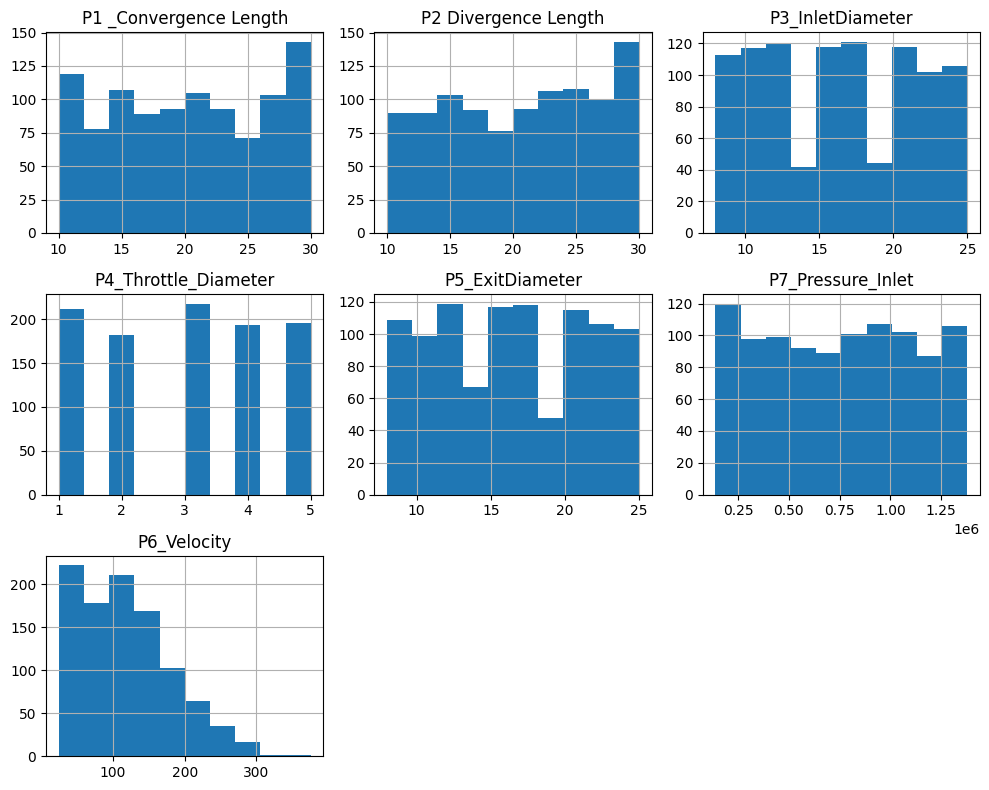


Scatter plot of Inlet Pressure vs. Exit Velocity:


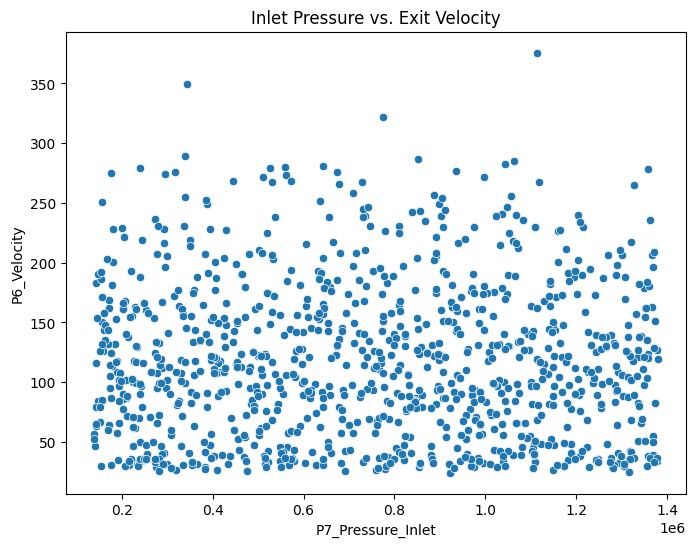

In [24]:
# Q1.3 Data Visualization

import matplotlib.pyplot as plt

# Histograms of numerical features
print("Histograms of Numerical Features:")
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Scatter plot of two potentially related features
print("\nScatter plot of Inlet Pressure vs. Exit Velocity:")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='P7_Pressure_Inlet', y='P6_Velocity', data=df)
plt.title('Inlet Pressure vs. Exit Velocity')
plt.xlabel('P7_Pressure_Inlet')
plt.ylabel('P6_Velocity')
plt.show()


Correlation Heatmap:


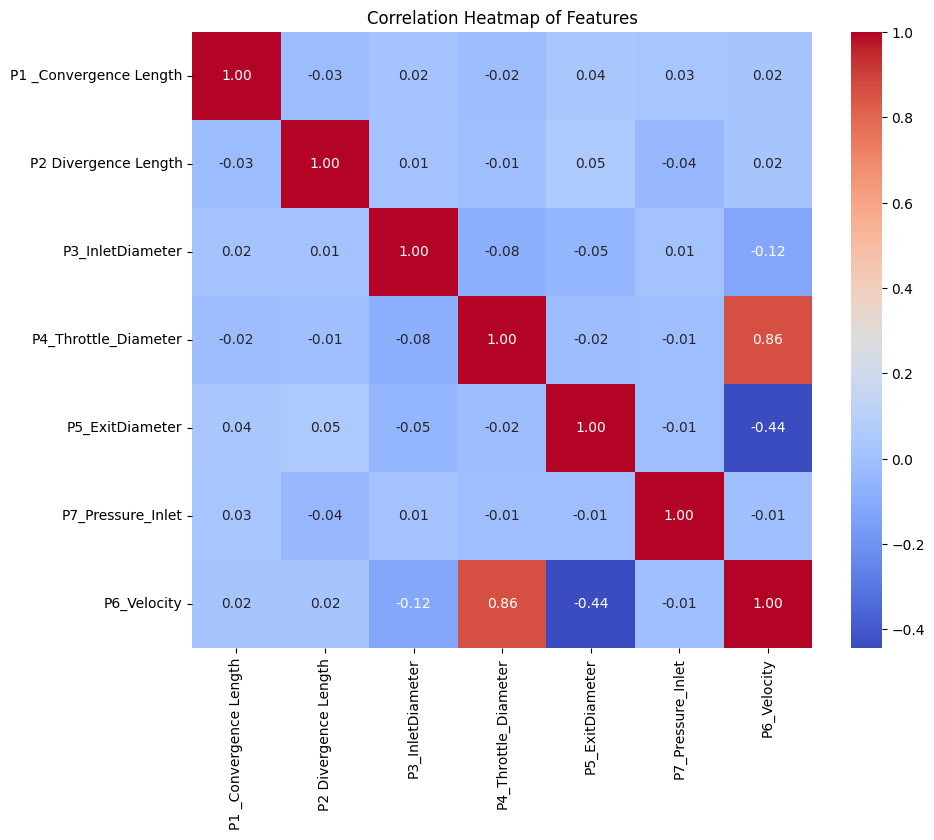

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap (if applicable and helpful)
# You might want to exclude the 'Name' column from correlation calculation
# if it's just an identifier.
if 'Name' in df.columns:
    corr_df = df.drop('Name', axis=1)
else:
    corr_df = df.copy()

print("\nCorrelation Heatmap:")
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

## Q1.4 Answer

**Main insights from the EDA:**

*   Dataset with 1001 observations and 8 features, including geometric parameters, inlet pressure, exit velocity, and the target variable, 'FlowRegime'.
*   The histograms show the distributions of the numerical features, giving us an idea of their ranges and whether they are skewed.
*   The scatter plot of Inlet Pressure vs. Exit Velocity suggests a potential relationship between these two parameters, which is expected in fluid dynamics.
*   The correlation heatmap indicates the strength and direction of linear relationships between the numerical features. This can help identify highly correlated features that might need to be addressed during feature selection.

**Potential issues or questions that arose:**

*   Based on the `df.info()` output and the missing value check, there are no missing values in this dataset, which simplifies the data cleaning process.
*   The correlation heatmap might reveal strong correlations between some features. While not necessarily an "issue," it's something to be aware of as highly correlated features can sometimes affect certain machine learning models. Need to examine the heatmap output to identify any such correlations. Might be helpful to reassess later if/when alternative features are added.
*   The histograms can help identify potential outliers in the numerical features. Further investigation might be needed to determine if these outliers are valid data points or errors.
*   Yet to examine the distribution of the categorical 'FlowRegime' variable. Understanding the class distribution (e.g., if one class is significantly more represented than others) is important for model selection and evaluation.

**Possible next steps in preparing the data for machine learning based modeling:**

*   **Handling Categorical Features:** The 'Name' column is just an identifier and can be dropped. The 'FlowRegime' column is our target variable and may need to be encoded into a numerical format if the chosen machine learning model requires it.
*   **Feature Scaling:** Numerical features like pressure and velocity might have very different scales. Scaling these features (e.g., using standardization or normalization) can improve the performance of many machine learning algorithms.
*   **Outlier Treatment:** If significant outliers are identified, might consider strategies like removing them, transforming the data, or using models that are robust to outliers.
*   **Feature "Engineering":** Might consider creating new features from the existing ones. For example, calculating area ratios from the diameter features, pressure ratios, Mach numbers, etc.
*   **Data Splitting:** Before training any model, data will be split into training, validation, and testing sets through preprocessing.